# Importamos librerias a utilizar

In [71]:
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2 as cv
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


# Importar Dataset

NumPy :  Python programming language library that provides support for large arrays and matrices.
    
NPY file : is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format. NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.


In [72]:
data = np.load('data_16_02.npy')

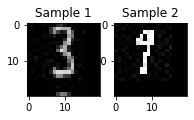

In [73]:
#Veamos como luce la data dentro del dataset 

data_without_label_1=data[:,0:400][random.randrange(0,10000)]
data_without_label_2=data[:,0:400][random.randrange(0,10000)]

resized_image_1 =np.resize(data_without_label_1,(20,20))
resized_image_2 =np.resize(data_without_label_2,(20,20))

img = Image.fromarray(resized_image_1).convert('L')
img.save('rand1.jpeg')
img = Image.fromarray(resized_image_2).convert('L')
img.save('rand2.jpeg')


img_1 = cv.imread('rand1.jpeg')
img_2 = cv.imread('rand2.jpeg')


plt.subplot(141)
plt.title("Sample 1")
plt.imshow(img_1)
plt.subplot(142)
plt.title("Sample 2")
plt.imshow(img_2)

plt.show()

Procesar Dataset 


In [74]:
dataframe=pd.DataFrame(data)
df_shufled = shuffle(dataframe)

In [75]:
df_training = df_shufled [0 : 11000]
df_testing = df_shufled [11000 : 11600 ]

In [76]:
df_training_features =  df_training.iloc[:,0:400].values 
df_training_labels   =  df_training.iloc[:,400:401].values 

df_testing_features  =  df_testing.iloc[:,0:400].values 
df_testing_labels   =  df_testing.iloc[:,400:401].values 

# Crear modelo neuronal

In [77]:
x_train = tf.keras.utils.normalize(df_training_features, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(df_testing_features, axis=1) # Normalize the testing dataset

In [78]:
x_train

array([[0.        , 0.00420825, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00095893, 0.        ,
        0.        ],
       [0.00746508, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [79]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
#model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(400,)))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax,input_shape=(128,)))
# Build the output layer
#model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
          
          
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
          

In [80]:

results =model.fit(x=x_train, y=df_training_labels, epochs=50) # Start training process

# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=df_testing_labels)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

Train on 11000 samples
Epoch 1/50
11000/11000 [==============================] - 1s 77us/sample - loss: 2.0561 - accuracy: 0.3431
Epoch 2/50
11000/11000 [==============================] - 1s 62us/sample - loss: 1.6402 - accuracy: 0.5098
Epoch 3/50
11000/11000 [==============================] - 1s 65us/sample - loss: 1.3831 - accuracy: 0.5997
Epoch 4/50
11000/11000 [==============================] - 1s 64us/sample - loss: 1.1979 - accuracy: 0.6578
Epoch 5/50
11000/11000 [==============================] - 1s 62us/sample - loss: 1.0563 - accuracy: 0.7075
Epoch 6/50
11000/11000 [==============================] - 1s 65us/sample - loss: 0.9412 - accuracy: 0.7466
Epoch 7/50
11000/11000 [==============================] - 1s 62us/sample - loss: 0.8486 - accuracy: 0.7742
Epoch 8/50
11000/11000 [==============================] - 1s 62us/sample - loss: 0.7708 - accuracy: 0.8025
Epoch 9/50
11000/11000 [==============================] - 1s 63us/sample - loss: 0.7064 - accuracy: 0.8228
Epoch 10/50
11

In [81]:
predictions = model.predict([x_test]) # Make prediction

train_acc = results.history['accuracy']
train_loss = results.history['loss']

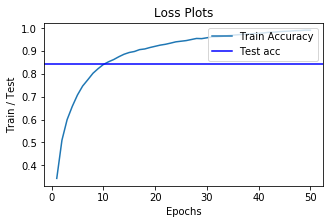

In [101]:
no_epochs = 50


fig=plt.figure(figsize=(5,3))
#plt.plot(np.arange(1, 1+no_epochs), train_loss, label="Train loss")
plt.plot(np.arange(1, 1+no_epochs), train_acc, label="Train Accuracy")
#plt.axhline(y=test_loss, color='g', linestyle='-', label="Test loss")
plt.axhline(y=test_acc, color='b', linestyle='-', label="Test acc")
plt.xlabel('Epochs')
plt.ylabel('Train / Test')
plt.title("Loss Plots")
plt.legend(loc='upper right')
plt.show()

# Analizamos casos de éxito

Valor a predecir:
[0]
Predicción:
0


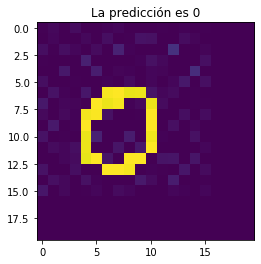

In [87]:
list_goods = []
for j in range(0,600):
    if (df_testing_labels[j] == np.argmax(predictions[j])) :
        list_goods.append(j)

value = list_goods[random.randrange(0,len(list_goods))]

print("Valor a predecir:")
print(df_testing_labels[value])
print("Predicción:")
print(np.argmax(predictions[value])) # Print out the number

resized_result =np.resize(df_testing_features[value],(20,20))  #229 

img = Image.fromarray(resized_result).convert('L')

plt.title("La predicción es "+str(np.argmax(predictions[value])))
plt.imshow(img)

plt.show()

# Analizamos casos de error

In [90]:
list_error = []
for j in range(0,600):
    if (df_testing_labels[j] != np.argmax(predictions[j])) :
        list_error.append(j)


value = list_error[random.randrange(0,len(list_error))]

print("Valor a predecir:")
print(df_testing_labels[value])
print("Predicción:")
print(np.argmax(predictions[value])) # Print out the number

Valor a predecir:
[2]
Predicción:
3


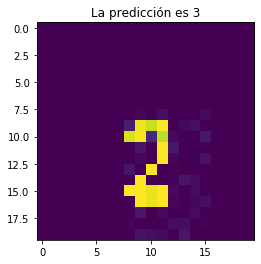

In [91]:
resized_result =np.resize(df_testing_features[value],(20,20))  #229 

img = Image.fromarray(resized_result).convert('L')

plt.title("La predicción es "+str(np.argmax(predictions[value])))
plt.imshow(img)

plt.show()